In [3]:
!cd /home/dgh84; mkdir cctest; touch cctest/.test; ls -al cctest/

mkdir: cannot create directory ‘cctest’: File exists
total 8
drwxr-xr-x  2 dgh84 dgh84 4096 May  4 22:50 .
drwxr-x--- 16 dgh84 dgh84 4096 May  7 12:41 ..
-rw-r--r--  1 dgh84 dgh84    0 May  7 16:33 .test


In [4]:
!rsync -h

rsync  version 3.2.7  protocol version 31
Copyright (C) 1996-2022 by Andrew Tridgell, Wayne Davison, and others.
Web site: https://rsync.samba.org/
Capabilities:
    64-bit files, 64-bit inums, 64-bit timestamps, 64-bit long ints,
    socketpairs, symlinks, symtimes, hardlinks, hardlink-specials,
    hardlink-symlinks, IPv6, atimes, batchfiles, inplace, append, ACLs,
    xattrs, optional secluded-args, iconv, prealloc, stop-at, no crtimes
Optimizations:
    SIMD-roll, no asm-roll, openssl-crypto, no asm-MD5
Checksum list:
    xxh128 xxh3 xxh64 (xxhash) md5 md4 sha1 none
Compress list:
    zstd lz4 zlibx zlib none
Daemon auth list:
    sha512 sha256 sha1 md5 md4

rsync comes with ABSOLUTELY NO WARRANTY.  This is free software, and you
are welcome to redistribute it under certain conditions.  See the GNU
General Public Licence for details.

rsync is a file transfer program capable of efficient remote update
via a fast differencing algorithm.

Usage: rsync [OPTION]... SRC [SRC]... DEST
  

In [5]:
!mkdir -p /home/dgh84/binfo1-work

In [6]:
%cd /home/dgh84/binfo1-work

/home/dgh84/binfo1-work


In [7]:
%cp -r /home/dgh84/binfo1-datapack1/* /home/dgh84/binfo1-work/

In [8]:
!featureCounts -a gencode.gtf -o read-counts.txt *.bam


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v2.0.6

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 6 BAM files                                      ||
||                                                                            ||
||                           CLIP-35L33G.bam                                  ||
||                           RNA-control.bam                                  ||
||                           RNA-siLin28a.bam                    

In [9]:
import pandas as pd
cnts = pd.read_csv('read-counts.txt', sep='\t', comment='#', index_col=0)
cnts.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
Geneid,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0


In [10]:
cnts['clip_enrichment'] = cnts['CLIP-35L33G.bam'] / cnts['RNA-control.bam']
cnts['rden_change'] = (cnts['RPF-siLin28a.bam'] / cnts['RNA-siLin28a.bam']) / (cnts['RPF-siLuc.bam'] / cnts['RNA-siLuc.bam'])
cnts.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
Geneid,,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0,4.0,NaN
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0,inf,NaN
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,NaN,NaN


<>:8: SyntaxWarning: invalid escape sequence '\l'
<>:9: SyntaxWarning: invalid escape sequence '\l'
<>:8: SyntaxWarning: invalid escape sequence '\l'
<>:9: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_625/3433584739.py:8: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('LIN28A CLIP enrichment ($\log_2$)')
/tmp/ipykernel_625/3433584739.py:9: SyntaxWarning: invalid escape sequence '\l'
  ax.set_ylabel('Ribosome density change upon Lin28a knockdown ($\log_2$)')
/home/dgh84/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'Ribosome density change upon Lin28a knockdown ($\\log_2$)')

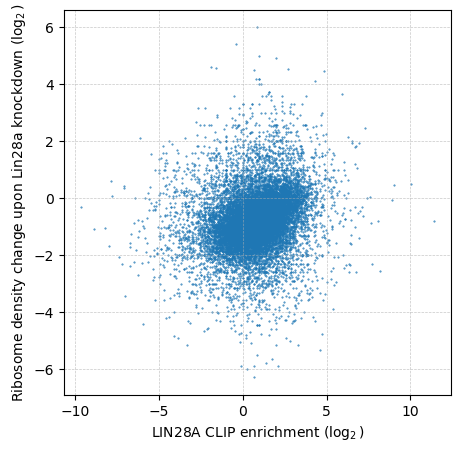

In [11]:
from matplotlib import pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(np.log2(cnts['clip_enrichment']),
           np.log2(cnts['rden_change']), s=0.2)
ax.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5, alpha=0.7)
ax.set_xlabel('LIN28A CLIP enrichment ($\log_2$)')
ax.set_ylabel('Ribosome density change upon Lin28a knockdown ($\log_2$)')

In [12]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
mouselocal = pd.read_csv('https://hyeshik.qbio.io/binfo/mouselocalization-20210507.txt', sep='\t')
mouselocal.head()

,gene_id,Gene names,type
0,ENSMUSG00000000001,Gnai3,cytoplasm
1,ENSMUSG00000000028,Cdc45 Cdc45l Cdc45l2,nucleus
2,ENSMUSG00000000049,Apoh B2gp1,cytoplasm
3,ENSMUSG00000000058,Cav2,cytoplasm
4,ENSMUSG00000000085,Scmh1,nucleus


In [13]:
import pandas as pd
import ssl

# 인증서 오류 방지 (필요 시)
ssl._create_default_https_context = ssl._create_unverified_context

# localization 데이터 불러오기
mouselocal = pd.read_csv('https://hyeshik.qbio.io/binfo/mouselocalization-20210507.txt', sep='\t')

# 컬럼명 확인
print(mouselocal.columns)

# 상위 5개 확인
mouselocal.head()

Index(['gene_id', 'Gene names', 'type'], dtype='object')


,gene_id,Gene names,type
0,ENSMUSG00000000001,Gnai3,cytoplasm
1,ENSMUSG00000000028,Cdc45 Cdc45l Cdc45l2,nucleus
2,ENSMUSG00000000049,Apoh B2gp1,cytoplasm
3,ENSMUSG00000000058,Cav2,cytoplasm
4,ENSMUSG00000000085,Scmh1,nucleus


In [14]:
# cnts 데이터 불러오기
cnts = pd.read_csv('read-counts.txt', sep='\t', comment='#', index_col=0)

# clip_enrichment와 rden_change 계산
cnts['clip_enrichment'] = cnts['CLIP-35L33G.bam'] / cnts['RNA-control.bam']
cnts['rden_change'] = (cnts['RPF-siLin28a.bam'] / cnts['RNA-siLin28a.bam']) / (cnts['RPF-siLuc.bam'] / cnts['RNA-siLuc.bam'])

# 상위 5개 확인
cnts.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
Geneid,,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0,4.0,NaN
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0,inf,NaN
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,NaN,NaN


In [15]:
# Geneid에서 .숫자 부분 제거
cnts = cnts.reset_index()
cnts['gene_id'] = cnts['Geneid'].str.replace(r'\.\d+$', '', regex=True)

# mouselocal도 동일하게 gene_id 정리
mouselocal['gene_id'] = mouselocal['gene_id'].str.replace(r'\.\d+$', '', regex=True)

# 결과 확인
print(cnts.head())
print(mouselocal.head())

                 Geneid                                 Chr  \
0  ENSMUSG00000102693.2                                chr1   
1  ENSMUSG00000064842.3                                chr1   
2  ENSMUSG00000051951.6  chr1;chr1;chr1;chr1;chr1;chr1;chr1   
3  ENSMUSG00000102851.2                                chr1   
4  ENSMUSG00000103377.2                                chr1   

                                               Start  \
0                                            3143476   
1                                            3172239   
2  3276124;3276746;3283662;3283832;3284705;349192...   
3                                            3322980   
4                                            3435954   

                                                 End         Strand  Length  \
0                                            3144545              +    1070   
1                                            3172348              +     110   
2  3277540;3277540;3285855;3286567;3287191;3492

In [16]:
# 데이터 병합
merged = pd.merge(cnts, mouselocal, how='left', on='gene_id')

# 병합 결과 확인
print(merged.head())

                 Geneid                                 Chr  \
0  ENSMUSG00000102693.2                                chr1   
1  ENSMUSG00000064842.3                                chr1   
2  ENSMUSG00000051951.6  chr1;chr1;chr1;chr1;chr1;chr1;chr1   
3  ENSMUSG00000102851.2                                chr1   
4  ENSMUSG00000103377.2                                chr1   

                                               Start  \
0                                            3143476   
1                                            3172239   
2  3276124;3276746;3283662;3283832;3284705;349192...   
3                                            3322980   
4                                            3435954   

                                                 End         Strand  Length  \
0                                            3144545              +    1070   
1                                            3172348              +     110   
2  3277540;3277540;3285855;3286567;3287191;3492

In [17]:
# 두 데이터셋에서 gene_id와 Geneid의 유니크 값 비교
cnts_gene_ids = set(cnts['gene_id'].unique())
mouselocal_gene_ids = set(mouselocal['gene_id'].unique())

# 비교
common_gene_ids = cnts_gene_ids & mouselocal_gene_ids
print(f"공통 gene_id 수: {len(common_gene_ids)}")

공통 gene_id 수: 9414


In [27]:
# 'type'이 nucleus, cytoplasm, integral membrane 중 하나인 데이터만 필터링
filtered = merged[merged['type'].isin(['nucleus', 'cytoplasm', 'integral membrane'])].copy()

# 병합된 데이터 확인 (상위 5개)
print(filtered.head())

                   Geneid                                                Chr  \
2    ENSMUSG00000051951.6                 chr1;chr1;chr1;chr1;chr1;chr1;chr1   
19  ENSMUSG00000025902.14  chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...   
33  ENSMUSG00000025903.15  chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...   
38  ENSMUSG00000002459.18  chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...   
47  ENSMUSG00000025905.15  chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...   

                                                Start  \
2   3276124;3276746;3283662;3283832;3284705;349192...   
19  4561154;4561473;4561613;4561936;4562680;456268...   
33  4878011;4878046;4878053;4878119;4878121;487813...   
38  4979799;4979799;4980625;4980697;4982537;498253...   
47  5658689;5658716;5658716;5658780;5659164;565922...   

                                                  End  \
2   3277540;3277540;3285855;3286567;3287191;349212...   
19  4562891;4562886;4562891;4562891;4563827;456289...   
33  4

In [28]:
# 'type' 값이 nucleus, cytoplasm, integral membrane 중 하나인 경우만 필터링
filtered = merged[merged['type'].isin(['nucleus', 'cytoplasm', 'integral membrane'])].copy()

# 필터링된 데이터 확인
print(filtered.head())

                   Geneid                                                Chr  \
2    ENSMUSG00000051951.6                 chr1;chr1;chr1;chr1;chr1;chr1;chr1   
19  ENSMUSG00000025902.14  chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...   
33  ENSMUSG00000025903.15  chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...   
38  ENSMUSG00000002459.18  chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...   
47  ENSMUSG00000025905.15  chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...   

                                                Start  \
2   3276124;3276746;3283662;3283832;3284705;349192...   
19  4561154;4561473;4561613;4561936;4562680;456268...   
33  4878011;4878046;4878053;4878119;4878121;487813...   
38  4979799;4979799;4980625;4980697;4982537;498253...   
47  5658689;5658716;5658716;5658780;5659164;565922...   

                                                  End  \
2   3277540;3277540;3285855;3286567;3287191;349212...   
19  4562891;4562886;4562891;4562891;4563827;456289...   
33  4

<>:18: SyntaxWarning: invalid escape sequence '\l'
<>:19: SyntaxWarning: invalid escape sequence '\l'
<>:18: SyntaxWarning: invalid escape sequence '\l'
<>:19: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_625/2277718208.py:18: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('LIN28A CLIP enrichment ($\log_2$)', fontsize=12)
/tmp/ipykernel_625/2277718208.py:19: SyntaxWarning: invalid escape sequence '\l'
  ax.set_ylabel('Ribosome density change upon Lin28a knockdown ($\log_2$)', fontsize=12)
/home/dgh84/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


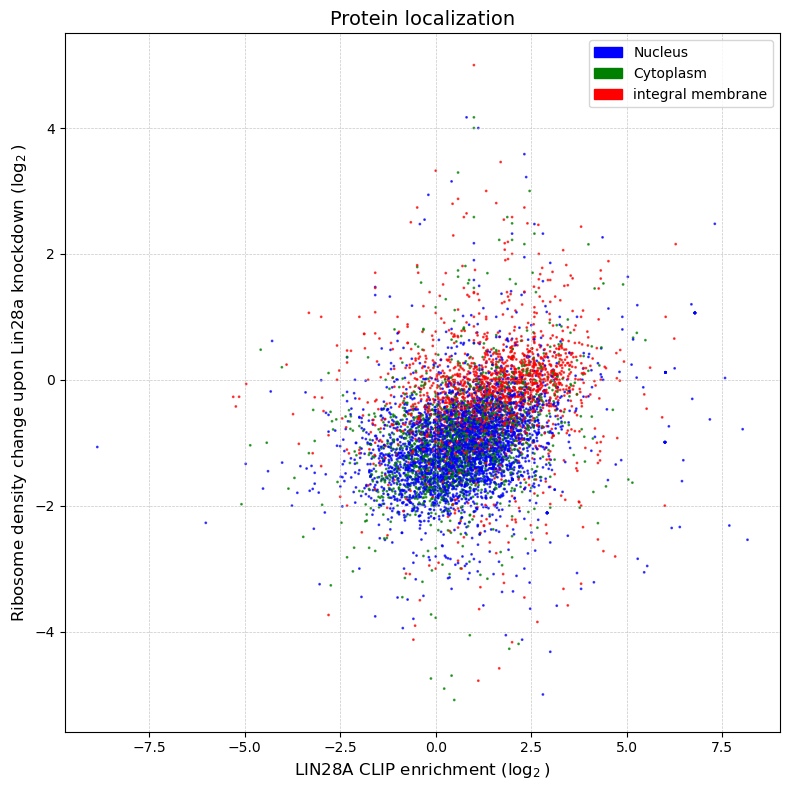

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# 색상 팔레트 정의 및 색상 매핑
palette = {'nucleus': 'blue', 'cytoplasm': 'green', 'integral membrane': 'red'}
colors = filtered['type'].map(palette)

# 스캐터 플롯 그리기
fig, ax = plt.subplots(figsize=(8, 8))

# 로그 변환 후 스캐터 플롯
ax.scatter(np.log2(filtered['clip_enrichment']),
           np.log2(filtered['rden_change']),
           c=colors, s=1, alpha=0.7)

# 레이블 추가
ax.set_xlabel('LIN28A CLIP enrichment ($\log_2$)', fontsize=12)
ax.set_ylabel('Ribosome density change upon Lin28a knockdown ($\log_2$)', fontsize=12)
ax.set_title('Protein localization', fontsize=14)

# 그리드 설정
ax.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5, alpha=0.7)

# 범례 추가
nucleus_patch = mpatches.Patch(color='blue', label='Nucleus')
cytoplasm_patch = mpatches.Patch(color='green', label='Cytoplasm')
integral_membrane_patch = mpatches.Patch(color='red', label='integral membrane')
ax.legend(handles=[nucleus_patch, cytoplasm_patch, integral_membrane_patch], loc='best')

# 레이아웃 정리
plt.tight_layout()

# 시각화 표시
plt.show()